# Homework 3

In [1]:
#import Pkg; Pkg.add("StatsPlots")
#Pkg.add("StatsFuns")
#Pkg.add("Interact")
#Pkg.add("WebIO")

## Draw Data Using Inverse Transform Sampling

A half-normal distribution is often denoted as $N^+(0, \sigma^2)$, which means it is a distribution obtained by truncating a normal distribution $N(0, \sigma^2)$ at the point of `0` and keeping only the positive part (thus the "+" sign) of it. Since it cuts the **underlying normal distribution** into half, it is called a **half-normal distribution**. As you can see from the following graph, the density of $N^+(0, \sigma^2)$ is twice as higher than that of the $N(0, \sigma^2)$.

This homework problem asks you to draw samples from the half-normal distribution $N^+(0, 2)$. It can be done in several ways.

### Define a half-normal distribution using `Distributions.jl`, then use `rand()` to generate 5,000 random values. Draw a histogram of the data and overlay it with the theoretical density plot of $N^+(0,2)$.

 - Hint: You need `Distributions` to define distributions and `StatsPlots` to draw the histogram and the overlaying density plot. You may also need `StatsFuns` to use the normal cdf function.


### (Very similar to the above) Define a half-normal distribution using `Distributions.jl`, then use `quantile()` to generate 5,000 random values. Draw a histogram of the data and overlay it with the theoretical density plot of $N^+(0,2)$. 



### Now, the above approaches are easy to implement in Julia because you could define a half-normal distribution using Julia's `Distributions.jl`. What if not? What if you are working with a software that has the quantile function, the normal distribution function, but does not have a pre-defined half-normal distribution function? Well, we can still draw 5,000 random values using the following line. Explain the logic of this line of code. Draw a histogram of the data and overlay it with the theoretical density plot of $N^+(0,2)$. 
```julia
data3 = quantile(Normal(0, sqrt(2)), 0.5*rand(5000) .+ 0.5)
```



### The theoretical mean and variance of the distribution are $\sigma \sqrt{\frac{2}{\pi}}$ and $\sigma^2 \left(1-\frac{2}{\pi}\right)$, respectively. Compare the means and standard deviations of the three datasets you generated to the theoretical values.



<p><a href="https://commons.wikimedia.org/wiki/File:Half_normal_pdf.svg#/media/File:Half_normal_pdf.svg"><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Half_normal_pdf.svg/1200px-Half_normal_pdf.svg.png" width=500></a></p>
image by Nagelum - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=58393258




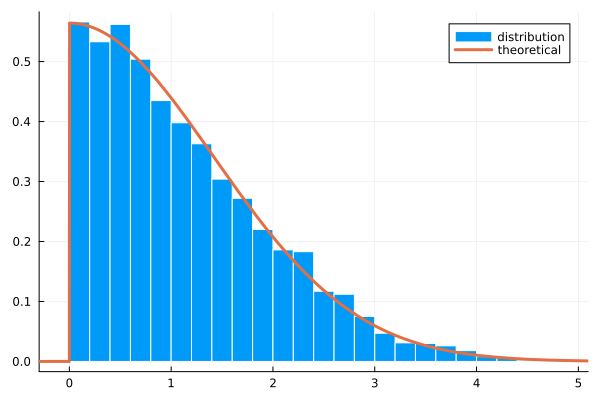

In [2]:
#1.1.1
using Distributions, StatsPlots, StatsFuns
set = rand(Truncated(Normal(0, sqrt(2)), 0, Inf),5000)
histogram(set,linecolor = "white",normalize = true,label = "distribution" )
plot!(x->pdf(Truncated(Normal(0, sqrt(2)), 0, Inf), x),lw = 3,xlim=xlims(),label = "theoretical")

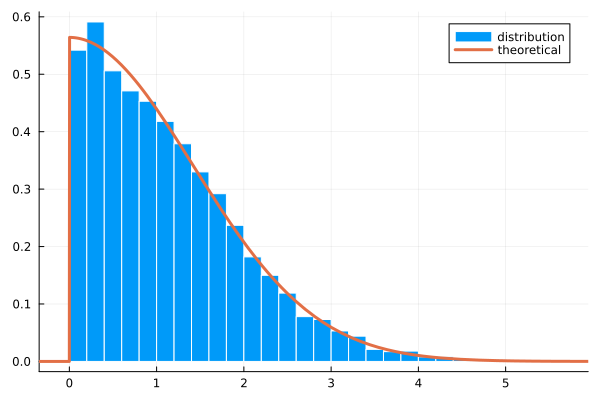

In [3]:
#1.1.2
set = quantile(Truncated(Normal(0, sqrt(2)), 0, Inf),rand(5000))
histogram(set,linecolor = "white",normalize = true,label = "distribution" )
plot!(x->pdf(Truncated(Normal(0, sqrt(2)), 0, Inf), x),lw = 3,xlim=xlims(),label = "theoretical")

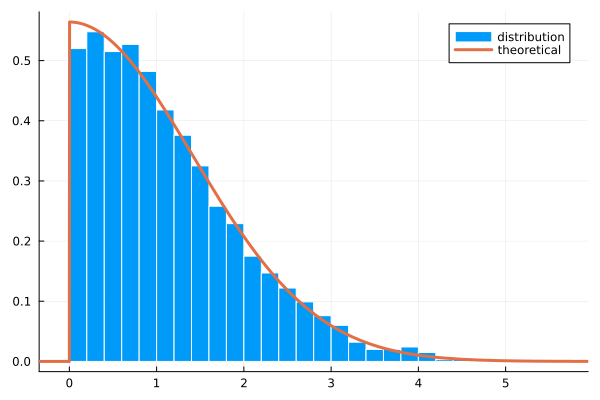

In [4]:
#1.1.3 
#先將rand()取值區間*0.5 + 5，改為[0.5,1]，只取常態分布大於0的部分。
set = quantile(Normal(0, sqrt(2)), 0.5*rand(5000) .+ 0.5 )
histogram(set,linecolor = "white",normalize = true,label = "distribution" )
plot!(x->pdf(Truncated(Normal(0, sqrt(2)), 0, Inf), x),lw = 3,xlim=xlims(),label = "theoretical")

In [5]:
#1.1.4
theo_mean = sqrt(2)*sqrt(2/π)
theo_var = 2 * (1 - 2/π)
mean1 = mean(rand(Truncated(Normal(0, sqrt(2)), 0, Inf),5000))
var1 = var(rand(Truncated(Normal(0, sqrt(2)), 0, Inf),5000))
mean2 = mean(quantile(Truncated(Normal(0, sqrt(2)), 0, Inf),rand(5000)))
var2 = var(quantile(Truncated(Normal(0, sqrt(2)), 0, Inf),rand(5000)))
mean3 = mean(quantile(Normal(0, sqrt(2)), 0.5*rand(5000) .+ 0.5 ))
var3 = var(quantile(Normal(0, sqrt(2)), 0.5*rand(5000) .+ 0.5 ))
print(theo_mean," ", theo_var,"\n")
print(mean1," ",var1,"\n")
print(mean2," ",var2,"\n")
print(mean3," ",var3,"\n")

1.1283791670955128 0.7267604552648372
1.1398959445962549 0.7386347382394258
1.1279111341535948 0.7337065755107839
1.130644586282213 0.7112603873698561


##  In the class, we showed how to transform values from a normal random variable $X \sim F_X(X)$ to values of an exponential random variable $Z \sim F_Z(Z)$. We used a three-step procedure to do this, and we drew graphs to have a visual confirmation on the transformation. This homework problem asks you to modify the graphs we used in class and observe the relationship between the sample size (`n` in the example) and the approximation of the distribution.

### Take a random sample $X$ of `n` measurements from $N(1,2)$ (note: the variance is 2), and draw a histogram of $X$ and compare it to the true $N(1,2)$ density (by overlaying the density to the histogram). Add a slider of $n$ from 100 to 20000. 
- Hint: You need to use packages of `Distributions`, `Plots`, `Interact`, `WebIO`, `StatsPlots`.
- Hint: Use `@manipulate` with a `for` loop.

In [6]:
#1.2.1
using Distributions, Plots, Interact, WebIO, StatsPlots
d = Normal(1,sqrt(2))
@manipulate for n in (100:100:20000) 
    X = rand(d,n)
    histogram(X,linecolor = "white",normalize = true,label = "distribution" )
    plot!(x->pdf(d, x),lw = 3,xlim=xlims(),label = "theoretical")
end

WebIO._IJuliaInit()

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 200, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(100), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\d3m2w\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\d3m2w\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\d3m2w\\.julia\\packages\\InteractBase\\Qhvxg\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\d3m2w\\.julia\\packages\\InteractBase\\Qhvxg\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\d3m2w\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000001376f6789c0, Task (runnable) @0x000001376f6789c0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"100\",\"200\",\"300\",\"400\",\"500\",\"600\",\"700\",\"800\",\"900\",\"1000\",\"1100\",\"1200\",\"1300\",\"1400\",\"1500\",\"1600\",\"1700\",\"1800\",\"1900\",\"2000\",\"2100\",\"2200\",\"2300\",\"2400\",\"2500\",\"2600\",\"2700\",\"2800\",\"2900\",\"3000\",\"3100\",\"3200\",\"3

### Continue from the above: Transform $X$ to $Y \sim U(0,1)$, and draw a histogram of $Y$ and compare it to a $U(0,1)$. Overlaying the histogram by the density plot of $U(0,1)$.
Hint: You will need `cdf()` function to transform `X` to `Y`.

In [7]:
#1.2.2
using Distributions, Plots, Interact, WebIO, StatsPlots
d = Normal(1,sqrt(2))
@manipulate for n in (100:100:20000) 
    X = rand(d,n)
    Y = cdf(d,X)
    p1 = histogram(Y,linecolor = "white",normalize = true,label = "distribution" )
         plot!(Uniform(0,1),lw = 3,xlim=xlims(),label = "theoretical")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 200, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(100), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\d3m2w\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\d3m2w\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\d3m2w\\.julia\\packages\\InteractBase\\Qhvxg\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\d3m2w\\.julia\\packages\\InteractBase\\Qhvxg\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\d3m2w\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000013700671d20, Task (runnable) @0x0000013700671d20), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"100\",\"200\",\"300\",\"400\",\"500\",\"600\",\"700\",\"800\",\"900\",\"1000\",\"1100\",\"1200\",\"1300\",\"1400\",\"1500\",\"1600\",\"1700\",\"1800\",\"1900\",\"2000\",\"2100\",\"2200\",\"2300\",\"2400\",\"2500\",\"2600\",\"2700\",\"2800\",\"2900\",\"3000\",\"3100\",\"3200\",\"3

### Continue from the above: Transform $Y$ to $Z ~ Exp(2)$ (exponential distribution, where mean=standard deviation=2) using an appropriate quantile function, and  draw a histogram of $Z$ and compare it to a Exp$(2)$. Overlay the histogram by a density plot of $Exp(2)$.

Note: If the histogram resembles the density plot, congratulations! You've successfully transformed normally distributed data to exponential distribution data.

In [8]:
#1.2.3
d = Normal(1,sqrt(2))
e = Exponential(2)
@manipulate for n in (100:100:20000) 
    X = rand(d,n)
    Y = cdf(d,X)
    Z = quantile(e,Y)
    p1 = histogram(Z,linecolor = "white",normalize = true,label = "distribution" )
         plot!(Exponential(2),lw = 3,xlim=xlims(),label = "theoretical")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 200, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(100), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\d3m2w\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\d3m2w\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\d3m2w\\.julia\\packages\\InteractBase\\Qhvxg\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\d3m2w\\.julia\\packages\\InteractBase\\Qhvxg\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\d3m2w\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000001376f7aba30, Task (runnable) @0x000001376f7aba30), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"100\",\"200\",\"300\",\"400\",\"500\",\"600\",\"700\",\"800\",\"900\",\"1000\",\"1100\",\"1200\",\"1300\",\"1400\",\"1500\",\"1600\",\"1700\",\"1800\",\"1900\",\"2000\",\"2100\",\"2200\",\"2300\",\"2400\",\"2500\",\"2600\",\"2700\",\"2800\",\"2900\",\"3000\",\"3100\",\"3200\",\"3

##  The 2nd step in the above transformation relies on PIT (probability integral transformation) which we introduced in the class. However, PIT works best only if the CDF we used in the transformation is close to the true CDF of $X$. This problem asks you to examine what would happen if the CDF used in the transformation is not the actual CDF of $X$.

### Take a random sample $X$ of `n` measurements from $N(1,2)$. Transform $X$ to $Y \sim U(0,1)$ using the CDF of $N(1,1)$. Draw a histogram of $Y$ and overlay it with the density plot of $U(0,1)$. Remember to add a slider of `n`. According to your visual, does $Y$ look like uniformly distributed?

In [9]:
#1.3.1
d = Normal(1,sqrt(2))
@manipulate for n in (100:100:20000) 
    X = rand(Normal(1,sqrt(1)),n)
    Y = cdf(d,X)
    p1 = histogram(Y,linecolor = "white",normalize = true,label = "distribution" )
         plot!(Uniform(0,1),lw = 3,xlim=xlims(),label = "theoretical")
end
#Absolutely not.

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 200, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(100), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\d3m2w\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\d3m2w\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\d3m2w\\.julia\\packages\\InteractBase\\Qhvxg\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\d3m2w\\.julia\\packages\\InteractBase\\Qhvxg\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\d3m2w\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000013703226e90, Task (runnable) @0x0000013703226e90), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"100\",\"200\",\"300\",\"400\",\"500\",\"600\",\"700\",\"800\",\"900\",\"1000\",\"1100\",\"1200\",\"1300\",\"1400\",\"1500\",\"1600\",\"1700\",\"1800\",\"1900\",\"2000\",\"2100\",\"2200\",\"2300\",\"2400\",\"2500\",\"2600\",\"2700\",\"2800\",\"2900\",\"3000\",\"3100\",\"3200\",\"3

### Continue from the above: Transform $Y$ to $Z ~ Exp(2)$ (exponential distribution, where mean=standard deviation=2) using an appropriate quantile function, and  draw a histogram of $Z$ and compare it to a Exp$(2)$. Overlay the histogram by a density plot of $Exp(2)$.

Question: Does the histogram match the density plot well? Why not?

In [10]:
d = Normal(1,sqrt(2))
e = Exponential(2)
@manipulate for n in (100:100:20000) 
    X = rand(d,n)
    Y = cdf(Normal(1,sqrt(1)),X)
    Z = quantile(e,Y)
    p1 = histogram(Z,linecolor = "white",normalize = true,label = "distribution" )
         plot!(Exponential(2),lw = 3,xlim=xlims(),label = "theoretical")
end
#No. CDF used in the transformation is not the actual CDF of X.

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 200, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(100), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\d3m2w\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\d3m2w\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\d3m2w\\.julia\\packages\\InteractBase\\Qhvxg\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\d3m2w\\.julia\\packages\\InteractBase\\Qhvxg\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\d3m2w\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000013703227840, Task (runnable) @0x0000013703227840), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"100\",\"200\",\"300\",\"400\",\"500\",\"600\",\"700\",\"800\",\"900\",\"1000\",\"1100\",\"1200\",\"1300\",\"1400\",\"1500\",\"1600\",\"1700\",\"1800\",\"1900\",\"2000\",\"2100\",\"2200\",\"2300\",\"2400\",\"2500\",\"2600\",\"2700\",\"2800\",\"2900\",\"3000\",\"3100\",\"3200\",\"3

### Take a random sample $X$ of `n` measurements from $N(1,2)$. Transform $X$ to $Y \sim U(0,1)$ using the CDF of an exponential distribution Exp(1). Draw a histogram of $Y$ and overlay it with the density plot of $U(0,1)$. Remember to add a slider of `n`. According to your visual, does $Y$ look like uniformly distributed?

In [11]:
d = Normal(1,sqrt(2))
@manipulate for n in (100:100:20000) 
    X = rand(Normal(1,sqrt(1)),n)
    Y = cdf(Exponential(1),X)
    p1 = histogram(Y,linecolor = "white",normalize = true,label = "distribution" )
         plot!(Uniform(0,1),lw = 3,xlim=xlims(),label = "theoretical")
end
#No.

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["n"], Dict{Symbol, Any}(:className => "interact ", :style => Dict{Any, Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol, Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol, Any}(:max => 200, :min => 1, :attributes => Dict{Any, Any}(:type => "range", Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}", "orient" => "horizontal"), :step => 1, :className => "slider slider is-fullwidth", :style => Dict{Any, Any}()))], Dict{Symbol, Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol, Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol, Any}(:className => "interact-flex-row-right"))], Dict{Symbol, Any}(:className => "interact-flex-row interact-widget")), Dict{String, Tuple{AbstractObservable, Union{Nothing, Bool}}}("changes" => (Observable(0), nothing), "index" => (Observable{Any}(100), nothing)), Set{String}(), nothing, Asset[Asset("js", "knockout", "C:\\Users\\d3m2w\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\d3m2w\\.julia\\packages\\Knockout\\HReiN\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\d3m2w\\.julia\\packages\\InteractBase\\Qhvxg\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\d3m2w\\.julia\\packages\\InteractBase\\Qhvxg\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\d3m2w\\.julia\\packages\\Interact\\PENUy\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any, Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")], "index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(32), Set{AbstractConnection}(), Condition(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000013703234200, Task (runnable) @0x0000013703234200), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"100\",\"200\",\"300\",\"400\",\"500\",\"600\",\"700\",\"800\",\"900\",\"1000\",\"1100\",\"1200\",\"1300\",\"1400\",\"1500\",\"1600\",\"1700\",\"1800\",\"1900\",\"2000\",\"2100\",\"2200\",\"2300\",\"2400\",\"2500\",\"2600\",\"2700\",\"2800\",\"2900\",\"3000\",\"3100\",\"3200\",\"3